In [1]:
# Change working directory
import os
os.chdir('/Users/yingbo/Documents/BX Data PMP Take-Home 2019')
os.getcwd()

'/Users/yingbo/Documents/BX Data PMP Take-Home 2019'

In [2]:
# Load the Pandas libraries with alias 'pd'
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
import seaborn as sns

#from sklearn import model_selection
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

In [3]:
# Set up decimal places for display purposes
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Read data from file 'pmp_takehome_2019.csv'
data = pd.read_csv('pmp_takehome_2019.csv')

In [5]:
# Preview the first five lines of the loaded data
data.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,"48,628,171.02","9,218,156.69","24,278,189.23",365880,4452,False
1,1,2,TX,"48,107,179.24","10,587,747.35","25,116,844.41",365880,4452,False
2,1,3,TX,"64,352,278.29","10,193,873.77","33,703,499.83",365880,4452,False
3,1,4,TX,"45,943,677.96","8,764,165.00","24,037,719.47",365880,4452,False
4,1,5,TX,"32,761,434.98","8,022,116.43","16,432,119.18",365880,4452,False


In [6]:
# Preview the last five lines of the loaded data
data.tail()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
3991,333,8,TX,"56,295,415.57","10,711,406.46","29,142,010.15",286920,4478,False
3992,333,9,TX,"63,512,936.32","12,675,148.57","32,346,778.80",286920,4478,False
3993,333,10,TX,"54,062,593.50","9,784,913.45","28,299,846.81",286920,4478,False
3994,333,11,TX,"48,903,414.85","10,638,082.89","25,285,040.20",286920,4478,False
3995,333,12,TX,"51,545,858.60","12,015,981.35","27,876,421.94",286920,4478,False


In [7]:
# Fix the column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.columns

Index(['location_number', 'month', 'state', 'gross_revenue', 'fixed_cost',
       'variable_cost', 'rental_cost', 'number_of_products', 'owned'],
      dtype='object')

In [8]:
# Check if data types of the variables are as expected
data.dtypes

location_number         int64
month                   int64
state                  object
gross_revenue         float64
fixed_cost            float64
variable_cost         float64
rental_cost             int64
number_of_products      int64
owned                    bool
dtype: object

In [9]:
# Check the unique states in the data and the percentage of total count
data['state'].value_counts(normalize = True, sort = True)
#data['state'].value_counts(normalize = True, sort = True).plot(kind='barh')

TX   0.30
CA   0.19
IL   0.16
GA   0.16
NJ   0.10
CO   0.05
WA   0.04
Name: state, dtype: float64

In [10]:
# Check the percentage of owned and leased locations
data['owned'].value_counts(normalize = True, sort = True)

False   0.89
True    0.11
Name: owned, dtype: float64

In [11]:
# Check the percentage of owned and leased locations by state
data.groupby(['state'])['owned'].value_counts(normalize = True)

state  owned
CA     False   0.95
       True    0.05
CO     False   0.87
       True    0.13
GA     False   0.93
       True    0.07
IL     False   0.78
       True    0.22
NJ     False   0.91
       True    0.09
TX     False   0.89
       True    0.11
WA     False   0.93
       True    0.07
Name: owned, dtype: float64

In [12]:
np.round(data['gross_revenue'].describe())

count         3,996.00
mean     30,091,813.00
std      16,563,743.00
min       3,307,785.00
25%      18,828,098.00
50%      26,314,156.00
75%      37,271,729.00
max     118,458,181.00
Name: gross_revenue, dtype: float64

In [13]:
# Check the total rental cost for owned and rental locations by state
data.groupby(['state', 'owned']).sum()[['rental_cost']]

rental_cost
state owned             
CA    False    117046080
      True             0
CO    False     24874920
      True             0
GA    False     91640400
      True             0
IL    False     80161200
      True             0
NJ    False     57669240
      True             0
TX    False    193072560
      True             0
WA    False     25829640
      True             0

In [14]:
# Part 1 – Summary statistics and plots

In [15]:
## 1) Looking across all locations, calculate the mean and median annual profit margin of a typical store. 

# Aggregate the data to calculate annual profit margin by location
data_annual = data.groupby(['location_number', 'state', 'owned']).sum()[['gross_revenue', 'fixed_cost', 
                                                                         'variable_cost', 'rental_cost', 
                                                                         'number_of_products']].reset_index()
data_annual['profit_margin'] = (data_annual.gross_revenue - data_annual.fixed_cost - 
                                data_annual.variable_cost - data_annual.rental_cost) / data_annual.gross_revenue

data_annual.head()

,location_number,state,owned,gross_revenue,fixed_cost,variable_cost,rental_cost,number_of_products,profit_margin
0,1,TX,False,"544,738,868.63","110,895,576.69","279,368,713.89",4390560,53424,0.28
1,2,TX,False,"355,973,012.71","72,873,948.79","193,729,099.95",783240,54024,0.25
2,3,IL,True,"331,771,805.46","64,297,748.55","184,827,877.00",0,55440,0.25
3,4,GA,False,"263,984,311.31","64,104,092.80","143,239,809.71",1696920,53772,0.21
4,5,NJ,False,"189,001,593.49","44,750,496.24","103,755,318.74",894000,54396,0.21


In [16]:
# calculate the mean and median annual profit margin of a typical store
mean = data_annual.profit_margin.mean()
print('Mean profit margin is ' + str("{:.2%}".format(mean)))

median = data_annual.profit_margin.median()
print('Median profit margin is ' + str("{:.2%}".format(median)))

Mean profit margin is 24.86%
Median profit margin is 26.18%


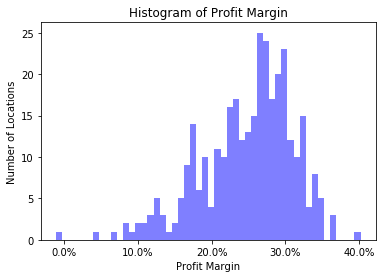

In [17]:
## Does the profit margin across locations appear normally distributed? Please visualize.
plt.hist(data_annual.profit_margin, 50,
         density = False,
         histtype = 'bar',
         color = 'blue',
         alpha = 0.5)

plt.xlabel('Profit Margin')
plt.ylabel('Number of Locations')
plt.title('Histogram of Profit Margin')
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.show()

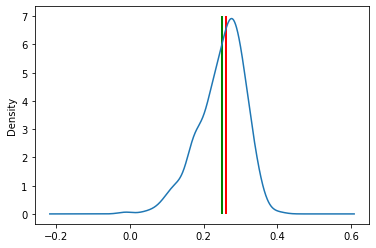

In [18]:
data_annual.profit_margin.plot(kind="density")


plt.vlines(data_annual.profit_margin.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=7,
           linewidth=2.0,
           color = 'green')

plt.vlines(data_annual.profit_margin.median(),   # Plot red line at median
           ymin=0, 
           ymax=7, 
           linewidth=2.0,
           color='red')

plt.show()
# The density plot shows that the annual profit margin across all locations is slightly left-skewed, meaning that it is not normally distributed.

In [19]:
## 2) Please plot the monthly and quarterly aggregate revenue across all stores.

# Calculate monthly revenue across all stores
revenue_monthly = data.groupby('month').sum()[['gross_revenue']].reset_index()

# Display the gross revenue in Billions
revenue_monthly.gross_revenue = revenue_monthly.gross_revenue / 1000000000
revenue_monthly

,month,gross_revenue
0,1,9.30
1,2,9.79
2,3,11.59
3,4,9.11
4,5,9.35
5,6,11.30
6,7,9.01
7,8,9.63
8,9,11.25
9,10,9.41


In [20]:
# Create a function for charting purposes
def plot(x, y, ax, title, x_label, y_label, xmin, xmax, xfreq, ymin, ymax, param_dict):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(x, y, **param_dict, linewidth = 1, markersize = 5)
    ax.margins(x=0, y=0)
    ax.set_ylim([ymin,ymax])

    plt.xticks(np.arange(xmin, xmax, xfreq))

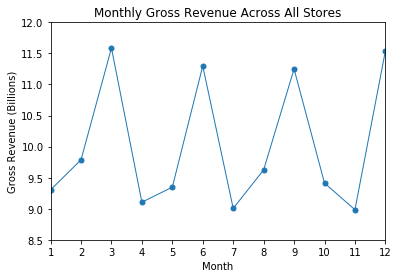

In [21]:
# Plot monthly gross revenue across all stores
x = revenue_monthly.month
y = revenue_monthly.gross_revenue

fig, ax = plt.subplots()
plot(x, y, ax, 'Monthly Gross Revenue Across All Stores', 'Month', 'Gross Revenue (Billions)', 1, 13, 1, 8.5, 12, {'marker': 'o'})

# Output the chart
plt.savefig("Monthly Gross Revenue Across All Stores.png")

# The chart shows seasonality pattern

In [22]:
revenue_monthly.loc[0:3, 'gross_revenue']

0    9.30
1    9.79
2   11.59
3    9.11
Name: gross_revenue, dtype: float64

In [23]:
def create_QTR(data):
    if np.any(data['month'] == [1,2,3]):
        QTR = 1
    elif np.any(data['month'] == [4,5,6]):
        QTR = 2
    elif np.any(data['month'] == [7,8,9]):
        QTR = 3
    else:
        QTR = 4
    return QTR

revenue_monthly['QTR'] = revenue_monthly.apply(create_QTR, axis=1)

revenue_monthly


,month,gross_revenue,QTR
0,1,9.30,1
1,2,9.79,1
2,3,11.59,1
3,4,9.11,2
4,5,9.35,2
5,6,11.30,2
6,7,9.01,3
7,8,9.63,3
8,9,11.25,3
9,10,9.41,4


In [24]:
# Calculate quarterly revenue across all stores
revenue_quarterly = revenue_monthly.groupby('QTR').sum()[['gross_revenue']].reset_index()

# Display the gross revenue in Billions
revenue_quarterly.gross_revenue = revenue_quarterly.gross_revenue
revenue_quarterly

,QTR,gross_revenue
0,1,30.68
1,2,29.75
2,3,29.88
3,4,29.94


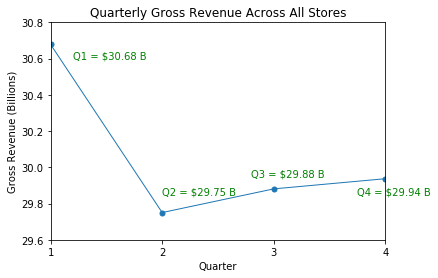

In [25]:
# Plot quarterly gross revenue across all stores
x = revenue_quarterly.QTR
y = revenue_quarterly.gross_revenue
fig, ax = plt.subplots()
plot(x, y, ax, 'Quarterly Gross Revenue Across All Stores', 'Quarter', 'Gross Revenue (Billions)', 1, 5, 1, 29.6, 30.8,
     {'marker': 'o'})

# Add labels to the plot
ax.text(1.2, 30.60, 'Q1 = $30.68 B', fontsize = 10, color = 'green')
ax.text(2.0, 29.85, 'Q2 = $29.75 B', fontsize = 10, color = 'green')
ax.text(2.8, 29.95, 'Q3 = $29.88 B', fontsize = 10, color = 'green')
ax.text(3.75, 29.85, 'Q4 = $29.94 B', fontsize = 10, color = 'green')

# Output the chart
plt.savefig("Quarterly Gross Revenue Across All Stores.png")

In [26]:
# Part 2 – Cleaning the data:

# You will have noticed that the company operates both owned and leased locations. 
# This creates an apples-to-oranges comparison, as only the leased locations are burdened with rental cost. 
# To prep your data for analysis, please impute an appropriate rental cost for each owned location and recalculate the rent-adjusted annual profit margin.


The average annual profit margin for owned locations is 28.62%
The average annual profit margin for leased locations is 24.41%


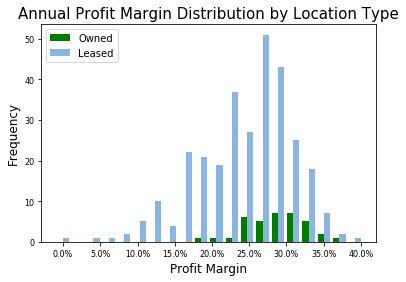

<Figure size 432x288 with 0 Axes>

In [27]:
# Firstly, let's calculate the average annual profit margin by location type

# Get the data for owned and leased locations
owned = data_annual.loc[data_annual['owned'] == True]
leased = data_annual.loc[data_annual['owned'] == False]

print('The average annual profit margin for owned locations is ' + str("{:.2%}".format(owned.profit_margin.mean())))
print('The average annual profit margin for leased locations is ' + str("{:.2%}".format(leased.profit_margin.mean())))

plt.hist([owned.profit_margin,leased.profit_margin], color=['#007D00','#8CB4E1'], alpha=1.0, bins=20)
plt.xlabel('Profit Margin', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Annual Profit Margin Distribution by Location Type', fontsize=15)
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.tick_params(labelsize=8)
plt.legend(['Owned', 'Leased'], loc='upper left')
plt.show()

# Output the chart
plt.savefig("Annual Profit Margin Distribution by Location Type.png")

In [40]:
# Approach: use the average ratio of rental cost/gross revenue by state to impute the rental cost for each owned location
#leased = data_annual.loc[data_annual['owned'] == False]

In [42]:
# Calculate the ratio of rental cost/gross revenue by location
leased.loc[:,'perc_rental_cost'] = leased.rental_cost / leased.gross_revenue * 100
leased.head()

,location_number,state,owned,gross_revenue,fixed_cost,variable_cost,rental_cost,number_of_products,profit_margin,rental_cost_impute,profit_margin_adj,perc_rental_cost
0,1,TX,False,"544,738,868.63","110,895,576.69","279,368,713.89",4390560,53424,0.28,"4,390,560.00",0.28,0.81
1,2,TX,False,"355,973,012.71","72,873,948.79","193,729,099.95",783240,54024,0.25,"783,240.00",0.25,0.22
3,4,GA,False,"263,984,311.31","64,104,092.80","143,239,809.71",1696920,53772,0.21,"1,696,920.00",0.21,0.64
4,5,NJ,False,"189,001,593.49","44,750,496.24","103,755,318.74",894000,54396,0.21,"894,000.00",0.21,0.47
5,6,IL,False,"117,024,430.37","31,993,754.01","65,840,306.80",393480,52476,0.16,"393,480.00",0.16,0.34


In [30]:
# Get the average ratio of rental cost/gross revenue by state
leased.groupby('state').mean()[['perc_rental_cost']].reset_index()

,state,perc_rental_cost
0,CA,0.61
1,CO,0.57
2,GA,0.63
3,IL,0.62
4,NJ,0.66
5,TX,0.55
6,WA,0.71


In [31]:
# Impute the rental cost for the owned locations by state
def impute_rental(data):
    if np.any(data['owned'] == True):
        if np.any(data['state'] == 'CA'):
            rental_cost_impute = data.gross_revenue * 0.61 / 100
        elif np.any(data['state'] == 'CO'):
            rental_cost_impute = data.gross_revenue * 0.57 / 100
        elif np.any(data['state'] == 'GA'):
            rental_cost_impute = data.gross_revenue * 0.63 / 100
        elif np.any(data['state'] == 'IL'):
            rental_cost_impute = data.gross_revenue * 0.62 / 100
        elif np.any(data['state'] == 'NJ'):
            rental_cost_impute = data.gross_revenue * 0.66 / 100
        elif np.any(data['state'] == 'TX'):
            rental_cost_impute = data.gross_revenue * 0.55 / 100
        elif np.any(data['state'] == 'WA'):
            rental_cost_impute = data.gross_revenue * 0.71 / 100
    else:
        rental_cost_impute = data.rental_cost
    return rental_cost_impute

data_annual['rental_cost_impute'] = data_annual.apply(impute_rental, axis=1)

data_annual.head()

,location_number,state,owned,gross_revenue,fixed_cost,variable_cost,rental_cost,number_of_products,profit_margin,rental_cost_impute
0,1,TX,False,"544,738,868.63","110,895,576.69","279,368,713.89",4390560,53424,0.28,"4,390,560.00"
1,2,TX,False,"355,973,012.71","72,873,948.79","193,729,099.95",783240,54024,0.25,"783,240.00"
2,3,IL,True,"331,771,805.46","64,297,748.55","184,827,877.00",0,55440,0.25,"2,056,985.19"
3,4,GA,False,"263,984,311.31","64,104,092.80","143,239,809.71",1696920,53772,0.21,"1,696,920.00"
4,5,NJ,False,"189,001,593.49","44,750,496.24","103,755,318.74",894000,54396,0.21,"894,000.00"


In [32]:
# Calculate rent-adjusted annual profit margin
data_annual['profit_margin_adj'] = (data_annual.gross_revenue - data_annual.fixed_cost - 
                                    data_annual.variable_cost - data_annual.rental_cost_impute) / data_annual.gross_revenue

data_annual.head()

,location_number,state,owned,gross_revenue,fixed_cost,variable_cost,rental_cost,number_of_products,profit_margin,rental_cost_impute,profit_margin_adj
0,1,TX,False,"544,738,868.63","110,895,576.69","279,368,713.89",4390560,53424,0.28,"4,390,560.00",0.28
1,2,TX,False,"355,973,012.71","72,873,948.79","193,729,099.95",783240,54024,0.25,"783,240.00",0.25
2,3,IL,True,"331,771,805.46","64,297,748.55","184,827,877.00",0,55440,0.25,"2,056,985.19",0.24
3,4,GA,False,"263,984,311.31","64,104,092.80","143,239,809.71",1696920,53772,0.21,"1,696,920.00",0.21
4,5,NJ,False,"189,001,593.49","44,750,496.24","103,755,318.74",894000,54396,0.21,"894,000.00",0.21


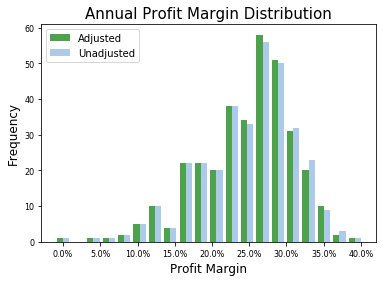

<Figure size 432x288 with 0 Axes>

In [33]:
# Compare the adjusted and unadjusted annual profit margin in one histogram
fig, ax = plt.subplots()
ax.hist([data_annual.profit_margin_adj, data_annual.profit_margin], color=['#007D00','#8CB4E1'], alpha=0.7, bins=20)
plt.xlabel('Profit Margin', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Annual Profit Margin Distribution', fontsize=15)
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.tick_params(labelsize=8)
plt.legend(['Adjusted', 'Unadjusted'], loc='upper left')
plt.show()

# Output the chart
plt.savefig("Annual Profit Margin Distribution.png")

In [34]:
print('The average rent-adjusted annual profit margin is ' + str("{:.2%}".format(data_annual.profit_margin_adj.mean())))
print('The average unadjusted annual profit margin is ' + str("{:.2%}".format(data_annual.profit_margin.mean())))

The average rent-adjusted annual profit margin is 24.80%
The average unadjusted annual profit margin is 24.86%


In [35]:
# Part 3 – Quantify drivers of success:
# With the data now cleaned, please identify factors that have led to historical outperformance across locations. 
# The CEO is principally focused on maximizing profit margin at each location. There is no single correct answer for 
# this section. We are more interested in your problem-solving process than any singular answer.

In [36]:
# Get the average ratio of rental cost/gross revenue by state
data_annual.groupby('state').mean()[['profit_margin_adj']].reset_index()

,state,profit_margin_adj
0,CA,0.26
1,CO,0.25
2,GA,0.21
3,IL,0.25
4,NJ,0.19
5,TX,0.28
6,WA,0.25


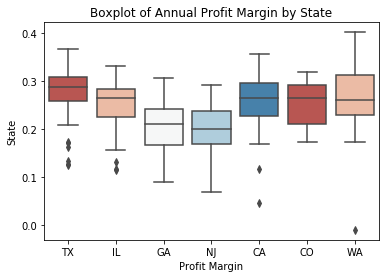

In [37]:
ax = sns.boxplot(x = 'state', y = data_annual['profit_margin_adj'], data = data_annual, 
                 palette = sns.color_palette('RdBu',5))

ax.set_title('Boxplot of Annual Profit Margin by State')
ax.set_ylabel('State')
ax.set_xlabel('Profit Margin')

# Output the chart
plt.savefig("Boxplot of Annual Profit Margin by State.png")

# Distribution of annual profit margin is different across states.

In [38]:
#array = pd.get_dummies(data_annual, columns=["state"]).values
#Y = array[:,12]
#Y=Y.astype('int')
#X = array[:,13:20]

#validation_size = 0.20
#seed = 7
#X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, 
#                                                                                random_state=seed)

In [39]:
# Initialize our classifier
#gnb = GaussianNB()

# Train our classifier
#model = gnb.fit(X_train, Y_train)

# Make predictions
#preds = gnb.predict(X_validation)
#print(preds)

# Evaluate accuracy
#print(accuracy_score(Y_validation, preds))